**Overview**

Os dados estão relacionados as campanhas de marketing direto de uma instituição bancária portuguesa.

**Dataset Description:**

Este conjunto de dados está relacionado a atividades de marketing, especificamente em campanhas para a subscrição de depósitos a prazo. Aqui está um resumo de cada coluna:

1. **Idade (age):** Idade do cliente, representada numericamente.

2. **Profissão (job):** Tipo de emprego do cliente, com categorias como 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed' e 'unknown'.

3. **Estado Civil (marital):** Estado civil do cliente, com categorias como 'divorced', 'married', 'single' e 'unknown' (divorciado, casado, solteiro e desconhecido).

4. **Educação (education):** Nível de educação do cliente, com categorias como 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree' e 'unknown'.

5. **Inadimplência (default):** Indica se o cliente possui crédito em situação de inadimplência, com categorias 'no', 'yes' e 'unknown' (não, sim e desconhecido).

6. **Empréstimo Imobiliário (housing):** Indica se o cliente possui empréstimo imobiliário, com categorias 'no', 'yes' e 'unknown' (não, sim e desconhecido).

7. **Empréstimo Pessoal (loan):** Indica se o cliente possui empréstimo pessoal, com categorias 'no', 'yes' e 'unknown' (não, sim e desconhecido).

8. **Contato (contact):** Tipo de comunicação de contato, com categorias 'cellular' (celular) e 'telephone' (telefone).

9. **Mês (month):** Mês do último contato do ano, com categorias de 'jan' a 'dec' (janeiro a dezembro).

10. **Dia da Semana (day_of_week):** Dia da semana do último contato, com categorias 'mon', 'tue', 'wed', 'thu' e 'fri' (segunda a sexta-feira).

11. **Duração (duration):** Duração do último contato em segundos.

12. **Campanha (campaign):** Número de contatos realizados durante esta campanha para este cliente.

13. **Pdays:** Número de dias desde o último contato do cliente em uma campanha anterior (999 significa que o cliente não foi contatado anteriormente).

14. **Contatos Anteriores (previous):** Número de contatos realizados antes desta campanha para este cliente.

15. **Resultado Anterior (poutcome):** Resultado da campanha de marketing anterior, com categorias 'failure' (falha), 'nonexistent' (inexistente) e 'success' (sucesso).

16. **Taxa de Variação do Emprego (emp.var.rate):** Taxa de variação do emprego - indicador trimestral.

17. **Índice de Preços ao Consumidor (cons.price.idx):** Índice de preços ao consumidor - indicador mensal.

18. **Índice de Confiança do Consumidor (cons.conf.idx):** Índice de confiança do consumidor - indicador mensal.

19. **Número de Empregados (nr.employed):** Número de funcionários - indicador trimestral.

20. **Variável de Saída (subscribed):** Indica se o cliente se inscreveu ou não em um depósito a prazo, com categorias 'yes' e 'no' (sim e não).

# Análise primária dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab CSV/pd_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Colab CSV/pd_test.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           37069 non-null  int64  
 1   age             37069 non-null  int64  
 2   job             33824 non-null  object 
 3   marital         37069 non-null  object 
 4   education       37052 non-null  object 
 5   default         37069 non-null  object 
 6   housing         37069 non-null  object 
 7   loan            37069 non-null  object 
 8   contact         37069 non-null  object 
 9   month           37069 non-null  object 
 10  day_of_week     37069 non-null  object 
 11  duration        7439 non-null   float64
 12  campaign        37069 non-null  int64  
 13  pdays           37069 non-null  int64  
 14  previous        37069 non-null  int64  
 15  poutcome        37069 non-null  object 
 16  emp.var.rate    37069 non-null  float64
 17  cons.price.idx  37069 non-null 

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4120 non-null   int64  
 1   age             4120 non-null   int64  
 2   job             3756 non-null   object 
 3   marital         4120 non-null   object 
 4   education       4119 non-null   object 
 5   default         4120 non-null   object 
 6   housing         4120 non-null   object 
 7   loan            4120 non-null   object 
 8   contact         4120 non-null   object 
 9   month           4120 non-null   object 
 10  day_of_week     4120 non-null   object 
 11  duration        799 non-null    float64
 12  campaign        4120 non-null   int64  
 13  pdays           4120 non-null   int64  
 14  previous        4120 non-null   int64  
 15  poutcome        4120 non-null   object 
 16  emp.var.rate    4120 non-null   float64
 17  cons.price.idx  4120 non-null   f

In [5]:
data_train.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,subscribed
0,0,52,technician,divorced,professional.course,unknown,yes,no,telephone,jun,...,NaN,8,0,0,nonexistent,1.4,94.465,-41.8,5228.1,no
1,1,36,management,married,university.degree,no,yes,no,cellular,nov,...,NaN,2,0,0,nonexistent,-0.1,93.200,-42.0,5195.8,no
2,2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,...,NaN,2,0,0,nonexistent,1.4,93.918,-42.7,5228.1,no
3,3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,...,NaN,1,4,1,success,-2.9,92.201,-31.4,5076.2,no
4,4,60,housemaid,married,high.school,unknown,yes,no,telephone,may,...,NaN,1,0,0,nonexistent,1.1,93.994,-36.4,5191.0,no


In [6]:
data_train.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,subscribed
0,0,52,technician,divorced,professional.course,unknown,yes,no,telephone,jun,...,NaN,8,0,0,nonexistent,1.4,94.465,-41.8,5228.1,no
1,1,36,management,married,university.degree,no,yes,no,cellular,nov,...,NaN,2,0,0,nonexistent,-0.1,93.200,-42.0,5195.8,no
2,2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,...,NaN,2,0,0,nonexistent,1.4,93.918,-42.7,5228.1,no
3,3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,...,NaN,1,4,1,success,-2.9,92.201,-31.4,5076.2,no
4,4,60,housemaid,married,high.school,unknown,yes,no,telephone,may,...,NaN,1,0,0,nonexistent,1.1,93.994,-36.4,5191.0,no


In [7]:
# Exploração de dados categóricos de train
colunas_object_train = data_train.select_dtypes(include=['object'])
for coluna in colunas_object_train.columns:
    valores_unicos = colunas_object_train[coluna].value_counts()
    print(f'Valores únicos na coluna {coluna}:\n{valores_unicos}\n')

Valores únicos na coluna job:
admin.           9364
blue-collar      8374
technician       6066
services         3565
management       2646
entrepreneur     1311
self-employed    1258
housemaid         944
unknown           296
Name: job, dtype: int64

Valores únicos na coluna marital:
married     22424
single      10439
divorced     4137
unknown        69
Name: marital, dtype: int64

Valores únicos na coluna education:
university.degree      10967
high.school             8549
basic.9y                5436
professional.course     4717
basic.4y                3748
basic.6y                2071
unknown                 1564
Name: education, dtype: int64

Valores únicos na coluna default:
no         29293
unknown     7773
yes            3
Name: default, dtype: int64

Valores únicos na coluna housing:
yes        19432
no         16744
unknown      893
Name: housing, dtype: int64

Valores únicos na coluna loan:
no         30518
yes         5658
unknown      893
Name: loan, dtype: int64

Valore

In [8]:
# Exploração de dados categóricos de test
colunas_object_test = data_test.select_dtypes(include=['object'])
for coluna in colunas_object_test.columns:
    valores_unicos = colunas_object_test[coluna].value_counts()
    print(f'Valores únicos na coluna {coluna}:\n{valores_unicos}\n')

Valores únicos na coluna job:
admin.           1058
blue-collar       880
technician        678
services          404
management        278
self-employed     163
entrepreneur      145
housemaid         116
unknown            34
Name: job, dtype: int64

Valores únicos na coluna marital:
married     2505
single      1129
divorced     475
unknown       11
Name: marital, dtype: int64

Valores únicos na coluna education:
university.degree      1201
high.school             966
basic.9y                609
professional.course     527
basic.4y                428
basic.6y                221
unknown                 167
Name: education, dtype: int64

Valores únicos na coluna default:
no         3295
unknown     824
yes           1
Name: default, dtype: int64

Valores únicos na coluna housing:
yes        2145
no         1878
unknown      97
Name: housing, dtype: int64

Valores únicos na coluna loan:
no         3433
yes         590
unknown      97
Name: loan, dtype: int64

Valores únicos na coluna c

# Tratamento de valores ausentes dos dados

In [9]:
# Porcentagem de valores ausentes e 'unknown' de train
porcent_nan_train = data_train.isnull().sum() / len(data_train) * 100
porcent_unknown_train = data_train.apply(lambda x: (x=='unknown').sum() / len(x) * 100)
porcent_nan_unknown_train = porcent_nan_train + porcent_unknown_train
porcent_nan_unknown_train

index              0.000000
age                0.000000
job                9.552456
marital            0.186139
education          4.265019
default           20.969004
housing            2.409021
loan               2.409021
contact            0.000000
month              0.000000
day_of_week        0.000000
duration          79.932019
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
nr.employed        0.000000
subscribed         0.000000
dtype: float64

In [10]:
# Porcentagem de valores ausentes e 'unknown' de test
porcent_nan_test = data_test.isnull().sum() / len(data_test) * 100
porcent_unknown_test = data_test.apply(lambda x: (x=='unknown').sum() / len(x) * 100)
porcent_nan_unknown_test = porcent_nan_test + porcent_unknown_test
porcent_nan_unknown_test

index              0.000000
age                0.000000
job                9.660194
marital            0.266990
education          4.077670
default           20.000000
housing            2.354369
loan               2.354369
contact            0.000000
month              0.000000
day_of_week        0.000000
duration          80.606796
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
nr.employed        0.000000
dtype: float64

In [11]:
data_train_tratado = data_train.drop(columns=['duration','index'],axis=1)
data_test_tratado = data_test.drop(columns=['duration','index'],axis=1)

In [12]:
# Remoção de duplicatas
data_train_tratado.drop_duplicates(inplace=True)

In [13]:
data_train_tratado.replace('unknown', np.nan, inplace=True)
data_test_tratado.replace('unknown', np.nan, inplace=True)

In [14]:
data_train_tratado.fillna(method='ffill', inplace=True)
data_test_tratado.fillna(method='ffill', inplace=True)

In [15]:
# Verificando a existência de valores 'unknown' em train
tem_unknown_train = (data_train_tratado == 'unknown').any()
tem_unknown_train

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
nr.employed       False
subscribed        False
dtype: bool

In [16]:
# Verificando existência de valores 'unknown' em test
tem_unknown_test = (data_test_tratado == 'unknown').any()
tem_unknown_test

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
nr.employed       False
dtype: bool

In [17]:
# Verificando existência de valores nulos em train
data_train_tratado.isnull().sum()

age               0
job               0
marital           0
education         0
default           1
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
subscribed        0
dtype: int64

In [18]:
# Verificando a existência de valores nulos em test
data_test_tratado.isnull().sum()

age               0
job               0
marital           0
education         0
default           1
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
dtype: int64

In [19]:
# Excluindo coluna desbalanceada 'default'
data_train_tratado.drop('default', axis=1, inplace=True)
data_test_tratado.drop('default', axis=1, inplace=True)

# Análise secundária dos dados

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
print('linhas x colunas - data_train_tratado:', data_train_tratado.shape)
print('linhas x colunas - data_test_tratado:', data_test_tratado.shape)

linhas x colunas - data_train_tratado: (35109, 18)
linhas x colunas - data_test_tratado: (4120, 17)


In [22]:
# Filtra apenas as colunas numéricas
colunas_numericas = data_train_tratado.loc[:, data_train_tratado.dtypes != 'object'].columns

In [23]:
data_train_tratado[colunas_numericas].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
count,35109.000000,35109.000000,35109.000000,35109.000000,35109.000000,35109.000000,35109.000000,35109.000000
mean,40.153465,2.627930,0.234185,0.181549,0.054798,93.575952,-40.526344,5165.557686
std,10.475117,2.821312,1.383266,0.508020,1.579658,0.584473,4.645046,73.042876
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,4963.600000
25%,32.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,5099.100000
50%,38.000000,2.000000,0.000000,0.000000,1.100000,93.798000,-41.800000,5191.000000
75%,47.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,5228.100000
max,98.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5228.100000


In [24]:
data_test_tratado[colunas_numericas].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
count,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000
mean,40.031068,2.573786,0.215291,0.164078,0.079175,93.568873,-40.474951,5167.679320
std,10.499032,2.809289,1.362990,0.471340,1.570649,0.581090,4.669787,71.262822
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,4963.600000
25%,32.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,5099.100000
50%,38.000000,2.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,5191.000000
75%,47.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,5228.100000
max,98.000000,41.000000,19.000000,5.000000,1.400000,94.767000,-26.900000,5228.100000


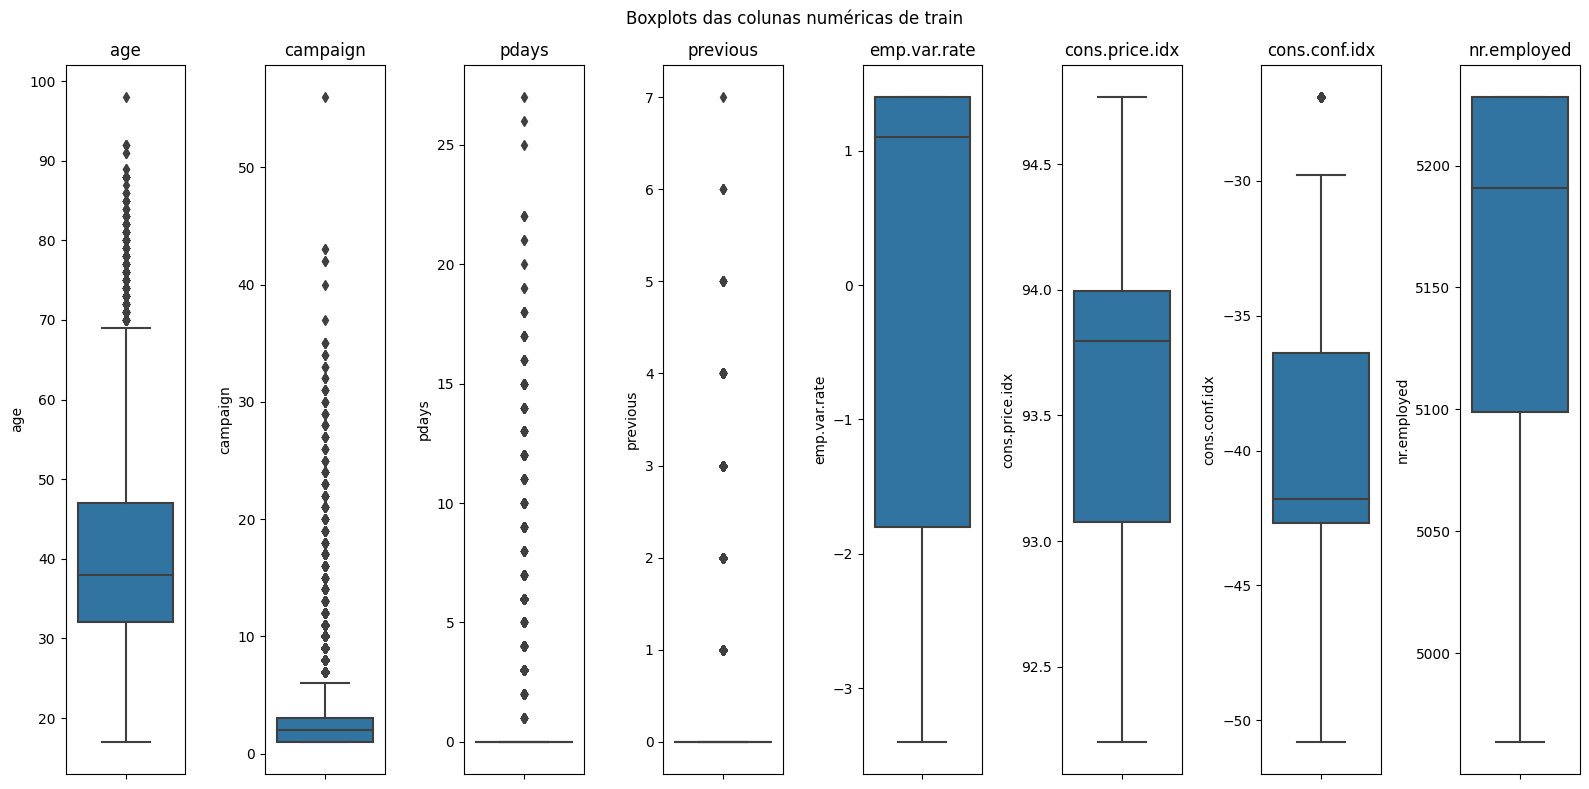

In [25]:
# Boxplots das colunas númericas de train
plt.figure(figsize=(16, 8))
plt.suptitle('Boxplots das colunas numéricas de train')
for coluna in colunas_numericas:
    plt.subplot(1, len(colunas_numericas), list(colunas_numericas).index(coluna) + 1)
    sns.boxplot(y=data_train_tratado[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()

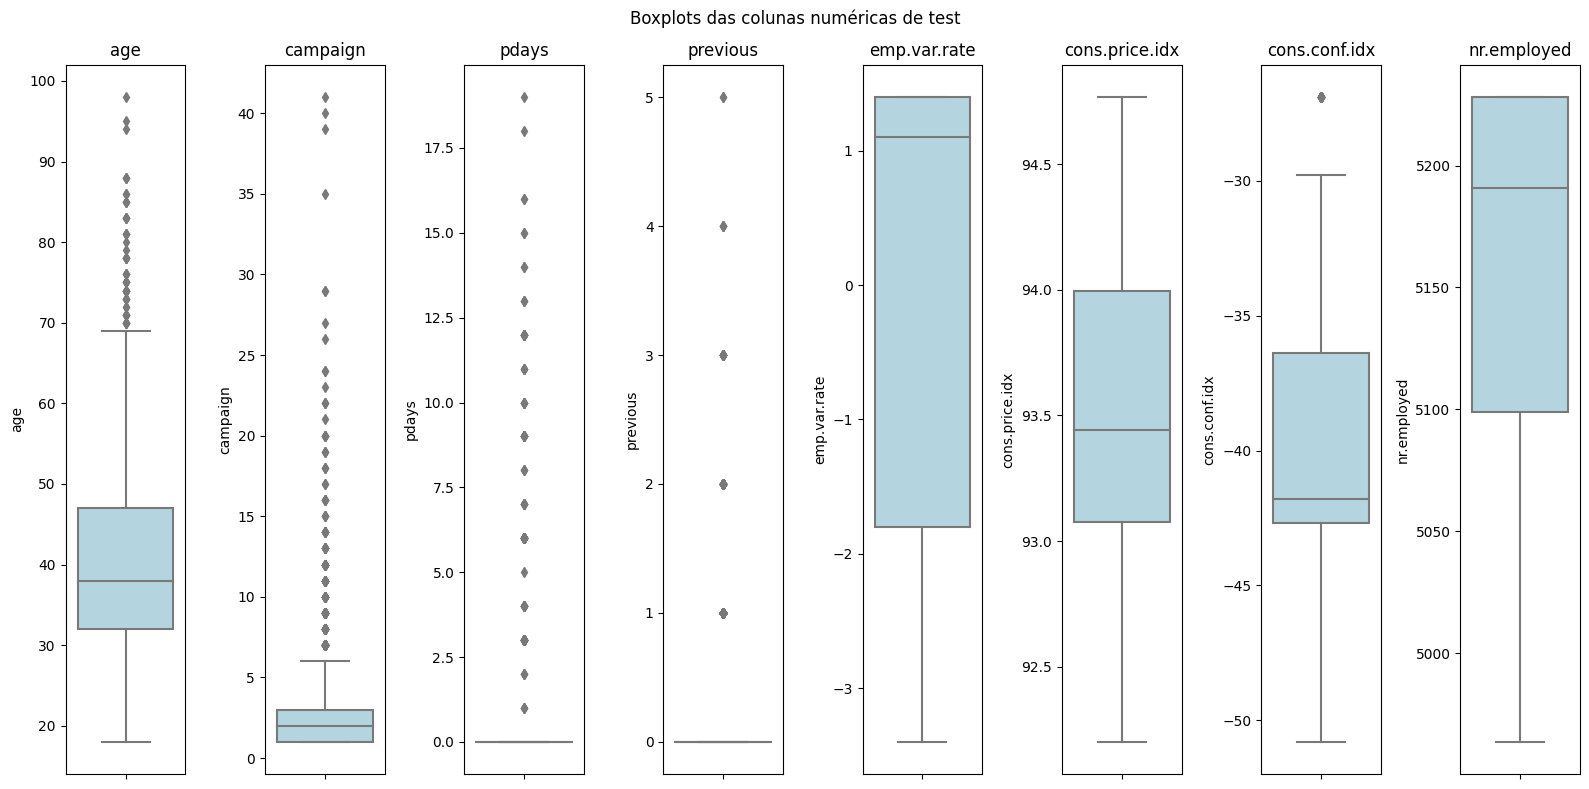

In [26]:
# Boxplots das colunas numéricas de test
plt.figure(figsize=(16, 8))
plt.suptitle('Boxplots das colunas numéricas de test')
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(1, len(colunas_numericas), i + 1)
    sns.boxplot(y=data_test_tratado[coluna], color='lightblue')
    plt.title(coluna)

plt.tight_layout()
plt.show()

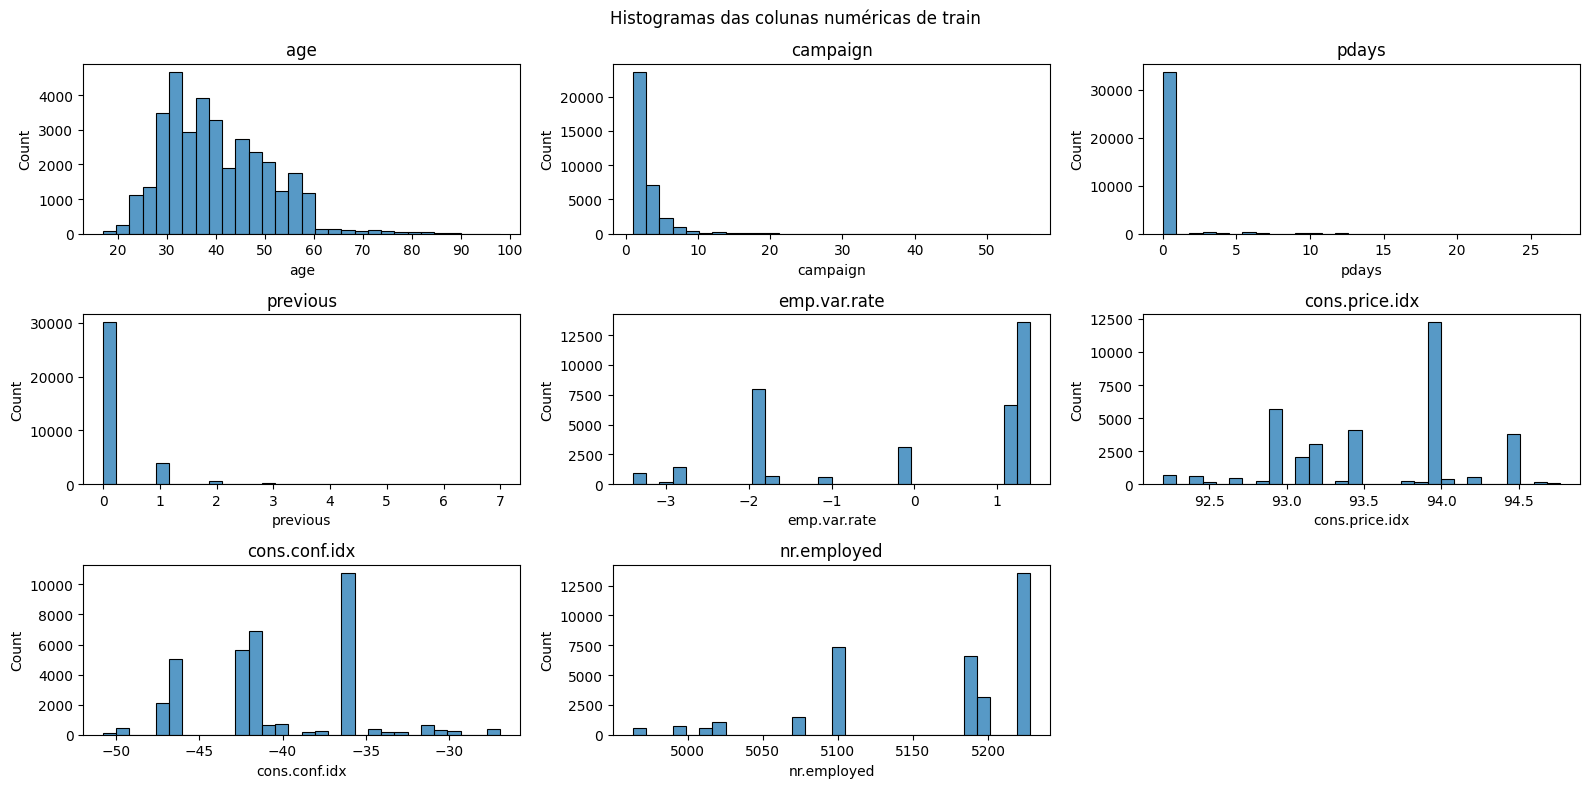

In [27]:
# Histogramas das colunas númericas de train
plt.figure(figsize=(16, 8))
plt.suptitle('Histogramas das colunas numéricas de train')
for coluna in colunas_numericas:
    plt.subplot(3, 3, list(colunas_numericas).index(coluna) + 1)
    sns.histplot(data=data_train_tratado, x=coluna, bins=30)
    plt.title(coluna)


plt.tight_layout()
plt.show()

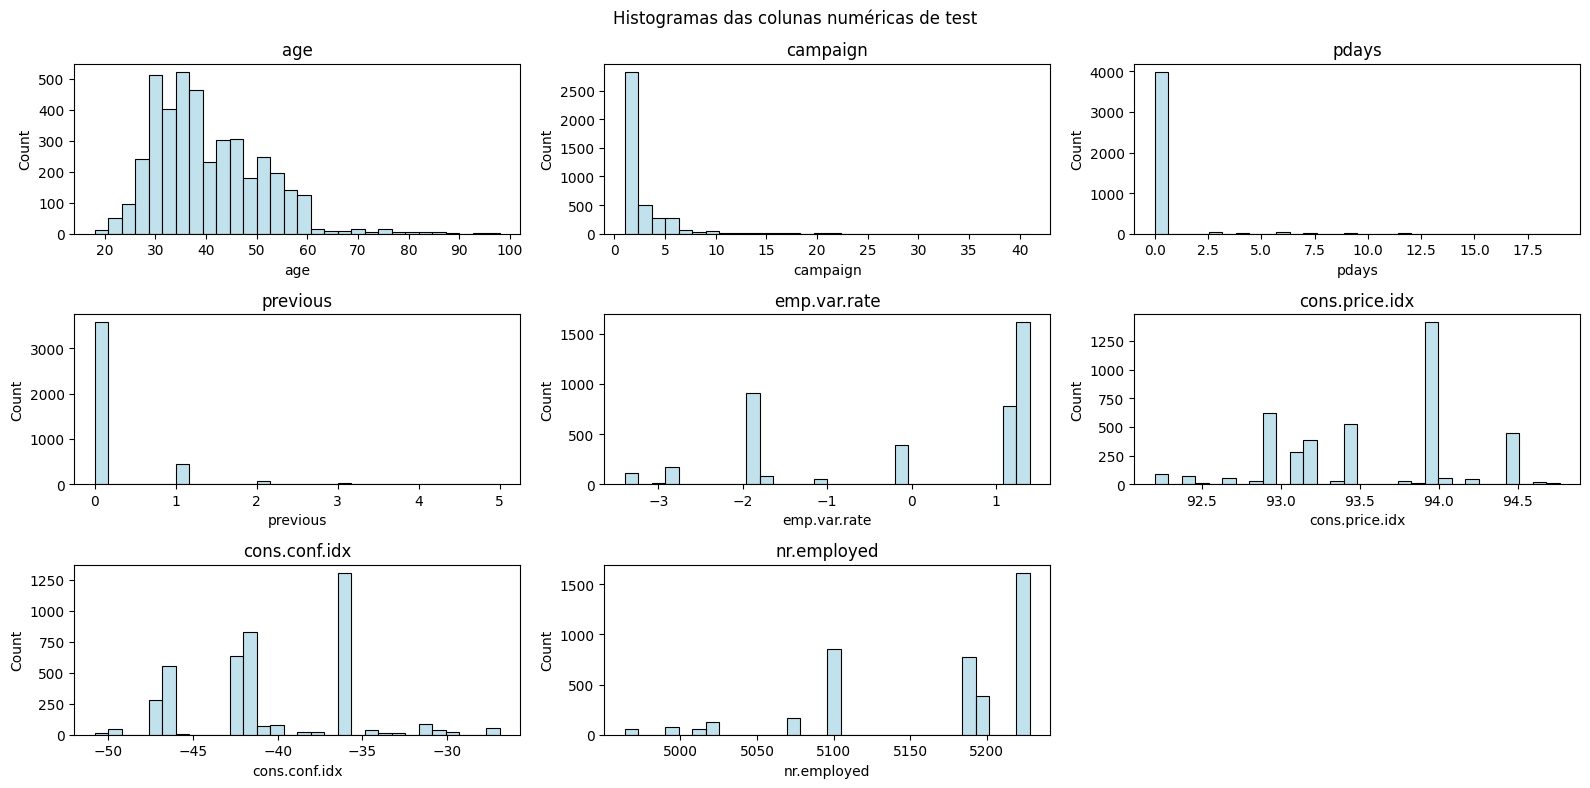

In [28]:
# Histogramas das colunas númericas de test
plt.figure(figsize=(16, 8))
plt.suptitle('Histogramas das colunas numéricas de test')
for coluna in colunas_numericas:
    plt.subplot(3, 3, list(colunas_numericas).index(coluna) + 1)
    sns.histplot(data=data_test_tratado, x=coluna, color='lightblue', bins=30)
    plt.title(coluna)
plt.tight_layout()
plt.show()

# Tratamento de outliers

In [29]:
# Tratamento de outliers usando o método IQR em train e test
for coluna in data_train_tratado.select_dtypes(include=['int', 'float']).columns:
    q1 = data_train_tratado[coluna].quantile(0.25)
    q3 = data_train_tratado[coluna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = round(q1 - 1.5 * iqr)
    upper_bound = round(q3 + 1.5 * iqr)
    data_train_tratado[coluna] = np.where((data_train_tratado[coluna] < lower_bound), lower_bound,
        (np.where( (data_train_tratado[coluna] > upper_bound), upper_bound, data_train_tratado[coluna] )
        )
    )

for coluna in data_test_tratado.select_dtypes(include=['int', 'float']).columns:
    q1 = data_test_tratado[coluna].quantile(0.25)
    q3 = data_test_tratado[coluna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = round(q1 - 1.5 * iqr)
    upper_bound = round(q3 + 1.5 * iqr)
    data_test_tratado[coluna] = np.where((data_test_tratado[coluna] < lower_bound), lower_bound,
        (np.where( (data_test_tratado[coluna] > upper_bound), upper_bound, data_test_tratado[coluna] )
        )
    )

# Preparando dados para treinamento de modelo de regressão linear

## Padronizando dados numéricos

In [30]:
# Padronização das variáveis numéricas

from sklearn.preprocessing import StandardScaler

cols_para_sscaler = data_train_tratado.select_dtypes(include=['float','int']).columns

# Criar um objeto do padronizador
scaler = StandardScaler()

# Ajustar e transformar os dados de train e test
data_train_tratado[cols_para_sscaler] = scaler.fit_transform(data_train_tratado[cols_para_sscaler])
data_test_tratado[cols_para_sscaler] = scaler.fit_transform(data_test_tratado[cols_para_sscaler])

## Codificando colunas 'object'

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Selecionando colunas

cols_para_oe = ['education', 'month', 'day_of_week']

# Codificando variáveis ordinais

ord_enc = OrdinalEncoder(categories=[
   ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree'],
   ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
   ['tue', 'mon', 'wed', 'fri', 'thu']])

# Ajustar e transformar os dados
data_train_tratado[cols_para_oe] = ord_enc.fit_transform(data_train_tratado[cols_para_oe])
data_test_tratado[cols_para_oe] = ord_enc.transform(data_test_tratado[cols_para_oe])


In [32]:
# Codificando variáveis nominais

# Resentando indices
data_train_tratado.reset_index(drop=True, inplace=True)
data_test_tratado.reset_index(drop=True, inplace=True)

# Selecionar as colunas para condificador one-hot
cols_para_ohe = ['housing', 'loan', 'job', 'marital', 'contact', 'poutcome']

# Criar um objeto do codificador
ohe = OneHotEncoder()

# Ajustar e transformar os dados de train
data_train_tratado_encoded = ohe.fit_transform(data_train_tratado[cols_para_ohe])

# Obter os nomes das colunas codificadas
cols_encoded = ohe.get_feature_names_out(cols_para_ohe)

# Criação do data train final codificado
data_train_ohe_final = pd.DataFrame(data_train_tratado_encoded.toarray(), columns=cols_encoded)

# Concatenar dataframes
data_train_tratado = pd.concat([data_train_tratado, data_train_ohe_final], axis=1)
data_train_tratado.drop(columns=cols_para_ohe, axis=1, inplace=True)

# Ajustar e transformar os dados de test
data_test_tratado_encoded = ohe.fit_transform(data_test_tratado[cols_para_ohe])

# Criação do data test final codificado e tratamento de index
data_test_ohe_final = pd.DataFrame(data_test_tratado_encoded.toarray(), columns=cols_encoded)

# Concatenar dataframes
data_test_tratado = pd.concat([data_test_tratado, data_test_ohe_final], axis=1)
data_test_tratado.drop(columns=cols_para_ohe, axis=1, inplace=True)

In [33]:
data_train_tratado['subscribed'].replace({'yes':1,'no':0}, inplace=True)

## Treinamento do modelo de regressão logística

In [34]:
# Treinamento do modelo
from sklearn.linear_model import LogisticRegression

X = data_train_tratado.drop(columns='subscribed', axis=1)
y = data_train_tratado['subscribed']

mod_regressao_subscribed = LogisticRegression(max_iter=1000).fit(X, y)

In [35]:
# Prevendo 'subscribed' de test
test_prev = mod_regressao_subscribed.predict(data_test_tratado)

In [36]:
resultados = pd.DataFrame(test_prev, index=pd.RangeIndex(37069, 37069+len(test_prev)))

In [37]:
resultados = resultados.rename(columns={0: 'subscribed'})
resultados = resultados.reset_index()

In [38]:
resultados.head()

,index,subscribed
0,37069,0
1,37070,0
2,37071,1
3,37072,0
4,37073,0


In [39]:
resultados.to_csv('resultado_portuguese_banking_institution.csv', index=False)